In [14]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import PCA_Transfer
path = 'default_of_credit_card_clients.csv'
train_x_y = pd.read_csv(path)

feature_list = ['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3',
                'PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4',
                'BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4',
                'PAY_AMT5','PAY_AMT6']

X = train_x_y[feature_list]
y = train_x_y.default_payment_next_month
#dimensional reduction

train_store = []
test_store = []
num_stage = []
num_feature = []
l = []
X = PCA_Transfer.PCA_Transfer(X,2)
for i in range(1,51):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    #The number of boosting stages to perform.
    # Gradient boosting is fairly robust to over-fitting
    # so a large number usually results in better performance.

    #maximum depth of the individual regression estimators.
    # The maximum depth limits the number of nodes in the tree.
    # Tune this parameter for best performance; the best value depends
    # on the interaction of the input variables.
    clf = GradientBoostingClassifier(n_estimators= i, learning_rate=1.0,
    max_depth = 1, random_state = 0).fit(X_train, y_train)
    clf.fit(X_train, y_train)
    y_pred_class = clf.predict(X_test)

    l.append(f1_score(y_test, y_pred_class, average='micro'))
    print("x_train,y_train score:",clf.score(X_train,y_train))
    print("x_test,y_test score:",clf.score(X_test, y_test))
    print("f1_score:",f1_score(y_test, y_pred_class, average='micro'))
    print("number of estimators:",i)
    print(metrics.classification_report(y_test, y_pred_class))
    num_stage.append(i)
    train_store.append(clf.score(X_train,y_train))
    test_store.append(clf.score(X_test, y_test))
print("F1 average:",sum(l) / 50)
#ax.plot(x, y1, lw=10, alpha=0.5, color='blue')


x_train,y_train score: 0.778416666667
x_test,y_test score: 0.780333333333
f1_score: 0.780333333333
number of estimators: 1
             precision    recall  f1-score   support

          0       0.78      1.00      0.88      4682
          1       0.00      0.00      0.00      1318

avg / total       0.61      0.78      0.68      6000

x_train,y_train score: 0.778833333333
x_test,y_test score: 0.778666666667
f1_score: 0.778666666667
number of estimators: 2
             precision    recall  f1-score   support

          0       0.78      1.00      0.88      4672
          1       0.00      0.00      0.00      1328

avg / total       0.61      0.78      0.68      6000

x_train,y_train score: 0.778916666667
x_test,y_test score: 0.778333333333
f1_score: 0.778333333333
number of estimators: 3
             precision    recall  f1-score   support

          0       0.78      1.00      0.88      4670
          1       0.00      0.00      0.00      1330

avg / total       0.61      0.78      0.

/Users/bingqianshan/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


x_train,y_train score: 0.777166666667
x_test,y_test score: 0.787666666667
f1_score: 0.787666666667
number of estimators: 4
             precision    recall  f1-score   support

          0       0.79      1.00      0.88      4725
          1       0.52      0.01      0.02      1275

avg / total       0.73      0.79      0.70      6000

x_train,y_train score: 0.779125
x_test,y_test score: 0.780166666667
f1_score: 0.780166666667
number of estimators: 5
             precision    recall  f1-score   support

          0       0.78      1.00      0.88      4676
          1       0.58      0.01      0.03      1324

avg / total       0.74      0.78      0.69      6000

x_train,y_train score: 0.7785
x_test,y_test score: 0.782333333333
f1_score: 0.782333333333
number of estimators: 6
             precision    recall  f1-score   support

          0       0.78      1.00      0.88      4690
          1       0.58      0.01      0.02      1310

avg / total       0.74      0.78      0.69      6000



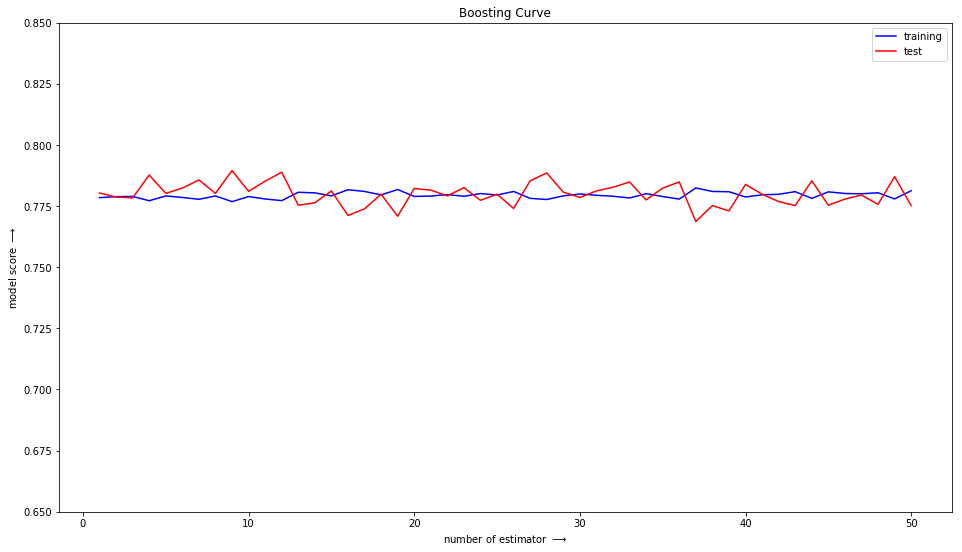

In [15]:
%matplotlib inline
plt.figure(figsize=(16,9))
train, = plt.plot(num_stage,train_store,color='blue',label='training')
test, = plt.plot(num_stage,test_store,color='red',label='test')

plt.legend(handles=[train, test] )

plt.xlabel(r'number of estimator $\longrightarrow$')
plt.ylabel(r'model score $\longrightarrow$')
plt.ylim(0.65,0.85)
plt.title("Boosting Curve", size=12)
